# Stroke Prediction 
Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
* 1) id: unique identifier
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

In [10]:
# Libraries Used
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, plot_confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/schne/Desktop/Stroke/healthcare-dataset-stroke-data.csv")
df = df.dropna()
print(df.tail())
print(df.shape)

         id  gender   age  hypertension  heart_disease ever_married  \
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  
(4

In [3]:
X = df[['bmi','age','hypertension','heart_disease','avg_glucose_level']]
Y = df['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 7991, stratify = Y)
X_train

,bmi,age,hypertension,heart_disease,avg_glucose_level
4146,31.0,56.0,0,0,82.64
2826,23.0,78.0,0,0,81.68
1969,30.8,39.0,0,0,90.36
4783,16.3,9.0,0,0,66.11
4277,24.8,2.0,0,0,126.12
...,...,...,...,...,...
3952,22.0,24.0,0,0,71.63
3935,28.4,50.0,0,0,61.54
115,30.9,71.0,1,1,216.94
452,37.1,29.0,0,0,83.51


In [4]:

f1 = make_scorer(f1_score , average='macro')

clf = svm.SVC(kernel='rbf') # Linear Kernel

Paramater_Grid = {"C": [1,10,100,1000,10000],
                     "gamma": [1,0.1,0.01,0.001,0.0001]}
Grid_Svm = GridSearchCV(clf,Paramater_Grid, refit=True, verbose = 1, cv =15,scoring=f1)


#Train the model using the training sets
Grid_Searched = Grid_Svm.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = Grid_Searched.predict(X_test)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  8.2min finished


In [5]:
Y_pred = Grid_Searched.predict(X_test)

In [6]:
print(Grid_Searched.best_params_)
t_acc = accuracy_score(Y_test, Y_pred) * 100
print(t_acc)

{'C': 10, 'gamma': 0.01}
95.24779361846572


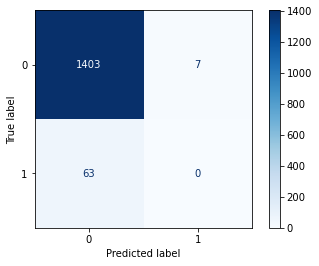

In [7]:
confusion_matrix(Y_test, Y_pred)
disp = plot_confusion_matrix(Grid_Svm, X_test, Y_test, cmap = plt.cm.Blues)

In [8]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9524779361846571


In [9]:
metrics.f1_score(Y_test, Y_pred, average='weighted', labels=np.unique(Y_pred))

0.933931773310408

### NB Classifer

In [11]:
NB_Model = GaussianNB()

#Train the model using the training sets
NB_Model.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred_NB = NB_Model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_NB))

Accuracy: 0.8730482009504412


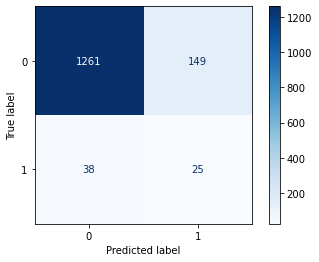

In [12]:
confusion_matrix(Y_test, Y_pred_NB)
disp = plot_confusion_matrix(NB_Model, X_test, Y_test, cmap = plt.cm.Blues)